In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('./dataset/train.csv')
print(train_df.shape)
train_df.head()

(45528, 19)


customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

In [3]:
train_df.drop(['customer_id','name'],axis=1,inplace=True)

## Handeling category columns

In [4]:
def encode_binary(data,val):
    if data==val:
        return 1
    return 0

train_df['gender'] = train_df['gender'].apply(lambda x: encode_binary(x,'M'))
train_df['owns_car'] = train_df['owns_car'].apply(lambda x: encode_binary(x,'Y'))
train_df['owns_house'] = train_df['owns_house'].apply(lambda x: encode_binary(x,'Y'))

train_df.head()

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0   46       0         0           1             0.0          107934.04   
1   29       1         0           1             0.0          109862.62   
2   37       1         0           1             0.0          230153.17   
3   39       0         0           1             0.0          122325.82   
4   46       1         1           1             0.0          387286.00   

   no_of_days_employed occupation_type  total_family_members  migrant_worker  \
0                612.0         Unknown                   1.0             1.0   
1               2771.0        Laborers                   2.0             0.0   
2                204.0        Laborers                   2.0             0.0   
3              11941.0      Core staff                   2.0             0.0   
4               1459.0      Core staff                   1.0             0.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              33070.28      18690.93                    73         544.0   
1              15329.53      37745.19                    52         857.0   
2              48416.60      41598.36                    43         650.0   
3              22574.36      32627.76                    20         754.0   
4              38282.95      52950.64                    75         927.0   

   prev_defaults  default_in_last_6months  credit_card_default  
0              2                        1                    1  
1              0                        0                    0  
2              0                        0                    0  
3              0                        0                    0  
4              0                        0                    0

In [5]:
train_df['no_of_children'].value_counts()

0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
8.0        1
7.0        1
9.0        1
Name: no_of_children, dtype: int64

In [6]:
dd=train_df['total_family_members'].value_counts()

# plotting to see the counts
x_val,y_val = [int(i) for i in dict(dd).keys()],[int(i) for i in dict(dd).values()]
plt.scatter(x_val,y_val)
plt.xticks(x_val)
# plt.yticks(y_val)
plt.grid()

In [7]:
train_df['occupation_type'].value_counts()

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

In [8]:
occupation_level = {
    'Unknown': 0,
    'Low-skill Laborers': 1,
    'Laborers': 2,
    'Cleaning staff': 3,
    'Drivers': 4,
    'Waiters/barmen staff': 5,
    'Cooking staff': 6,
    'Security staff': 7,
    'Secretaries': 8,
    'Realty agents': 9,
    'Sales staff': 10,
    'Accountants': 11,
    'Core staff': 12,
    'Medicine staff': 13,
    'Private service staff': 14,                  
    'Managers': 15,
    'HR staff': 16,
    'High skill tech staff': 17, 
    'IT staff': 18
}
train_df.replace({"occupation_type":occupation_level},inplace=True)
train_df.head()

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0   46       0         0           1             0.0          107934.04   
1   29       1         0           1             0.0          109862.62   
2   37       1         0           1             0.0          230153.17   
3   39       0         0           1             0.0          122325.82   
4   46       1         1           1             0.0          387286.00   

   no_of_days_employed  occupation_type  total_family_members  migrant_worker  \
0                612.0                0                   1.0             1.0   
1               2771.0                2                   2.0             0.0   
2                204.0                2                   2.0             0.0   
3              11941.0               12                   2.0             0.0   
4               1459.0               12                   1.0             0.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              33070.28      18690.93                    73         544.0   
1              15329.53      37745.19                    52         857.0   
2              48416.60      41598.36                    43         650.0   
3              22574.36      32627.76                    20         754.0   
4              38282.95      52950.64                    75         927.0   

   prev_defaults  default_in_last_6months  credit_card_default  
0              2                        1                    1  
1              0                        0                    0  
2              0                        0                    0  
3              0                        0                    0  
4              0                        0                    0

In [9]:
train_df['migrant_worker'].value_counts()

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

In [10]:
train_df['prev_defaults'].value_counts()

0    43060
1     2172
2      296
Name: prev_defaults, dtype: int64

In [11]:
train_df['default_in_last_6months'].value_counts()

0    43227
1     2301
Name: default_in_last_6months, dtype: int64

## Handeling missing values

In [12]:
train_df.isnull().sum()

age                          0
gender                       0
owns_car                     0
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [13]:
# column with potential category values
null_value_cols =  ['no_of_children','total_family_members','migrant_worker']
for col in null_value_cols:
    print('\n\t '+col.replace('_',' ').upper())
    print(train_df[col].value_counts())
    print('\nMode : ',train_df[col].mode())


	 NO OF CHILDREN
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
8.0        1
7.0        1
9.0        1
Name: no_of_children, dtype: int64

Mode :  0    0.0
dtype: float64

	 TOTAL FAMILY MEMBERS
2.0     23455
1.0      9913
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
10.0        2
9.0         1
Name: total_family_members, dtype: int64

Mode :  0    2.0
dtype: float64

	 MIGRANT WORKER
0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

Mode :  0    0.0
dtype: float64


In [14]:
null_value_cols =  ['no_of_children','total_family_members','migrant_worker']
for col in null_value_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [15]:
train_df.corr()

age    gender  owns_car  owns_house  \
age                      1.000000 -0.004315 -0.006826    0.002367   
gender                  -0.004315  1.000000  0.342915   -0.041853   
owns_car                -0.006826  0.342915  1.000000    0.005821   
owns_house               0.002367 -0.041853  0.005821    1.000000   
no_of_children          -0.008340  0.055356  0.103379   -0.004777   
net_yearly_income        0.004079  0.028120  0.031740    0.003015   
no_of_days_employed      0.000506 -0.154530 -0.150815    0.061901   
occupation_type         -0.002223 -0.100799  0.058897   -0.028834   
total_family_members    -0.010643  0.088367  0.149466    0.003777   
migrant_worker          -0.005576  0.134929  0.094016   -0.025227   
yearly_debt_payments    -0.002453  0.081721  0.133767   -0.003845   
credit_limit             0.004473  0.026988  0.030387    0.003172   
credit_limit_used(%)    -0.005529  0.019465 -0.002469    0.001453   
credit_score             0.000817 -0.032570  0.008156    0.002121   
prev_defaults            0.001393  0.049822 -0.011274    0.003068   
default_in_last_6months -0.001406  0.045886 -0.015965   -0.002221   
credit_card_default     -0.000983  0.057579 -0.017104   -0.002693   

                         no_of_children  net_yearly_income  \
age                           -0.008340           0.004079   
gender                         0.055356           0.028120   
owns_car                       0.103379           0.031740   
owns_house                    -0.004777           0.003015   
no_of_children                 1.000000           0.009006   
net_yearly_income              0.009006           1.000000   
no_of_days_employed           -0.240139          -0.029367   
occupation_type                0.119482           0.026791   
total_family_members           0.869968           0.010442   
migrant_worker                 0.070504           0.001501   
yearly_debt_payments           0.028349           0.076958   
credit_limit                   0.009427           0.993378   
credit_limit_used(%)           0.006783           0.002696   
credit_score                  -0.014882          -0.009688   
prev_defaults                  0.019031          -0.004696   
default_in_last_6months        0.021382           0.015092   
credit_card_default            0.023262           0.011508   

                         no_of_days_employed  occupation_type  \
age                                 0.000506        -0.002223   
gender                             -0.154530        -0.100799   
owns_car                           -0.150815         0.058897   
owns_house                          0.061901        -0.028834   
no_of_children                     -0.240139         0.119482   
net_yearly_income                  -0.029367         0.026791   
no_of_days_employed                 1.000000        -0.463389   
occupation_type                    -0.463389         1.000000   
total_family_members               -0.229128         0.113917   
migrant_worker                     -0.219402         0.040335   
yearly_debt_payments               -0.104545         0.119057   
credit_limit                       -0.027745         0.025427   
credit_limit_used(%)               -0.018720         0.001926   
credit_score                        0.035533         0.002886   
prev_defaults                      -0.036232        -0.015253   
default_in_last_6months            -0.034295        -0.018072   
credit_card_default                -0.047043        -0.012603   

                         total_family_members  migrant_worker  \
age                                 -0.010643       -0.005576   
gender                               0.088367        0.134929   
owns_car                             0.149466        0.094016   
owns_house                           0.003777       -0.025227   
no_of_children                       0.869968        0.070504   
net_yearly_income                    0.010442        0.001501   
no_of_days_employed                 -0.22912

In [16]:
train_df['no_of_days_employed'].mean()

67609.2892932431

-  can not see any corelation between missing value cols which is continous , so will replace them with mean value of that col 

In [17]:
null_col_cont = ['no_of_days_employed','yearly_debt_payments','credit_score']
for col in null_col_cont:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
train_df.isnull().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [18]:
y_train = train_df['credit_card_default']
x_train = train_df.drop(['credit_card_default'],axis=1)

## Trying scaling , regularization 

In [19]:
def plot_columns(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

plot_columns(train_df,train_df.columns,8,4)

In [20]:
from sklearn.preprocessing import StandardScaler

X = train_df.drop(['credit_card_default'],axis=1)

std_scale = StandardScaler()
std_scale.fit(X)

StandardScaler()

In [21]:
std_scale.mean_

array([3.89934106e+01, 3.41987348e-01, 3.34695133e-01, 6.95000879e-01,
       4.13503778e-01, 2.00655622e+05, 6.76092893e+04, 5.67652873e+00,
       2.15779301e+00, 1.78769109e-01, 3.17969653e+04, 4.35484160e+04,
       5.22350202e+01, 7.82791257e+02, 6.07098928e-02, 5.05403268e-02])

In [22]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scale = MinMaxScaler()
# min_max_scale.fit(X)

In [23]:
# from sklearn.model_selection import train_test_split

# y_train = train_df['credit_card_default']
x_train = train_df.drop(['credit_card_default'],axis=1)

# scaling transform
x_train_scaled = std_scale.transform(X)
# x_train = min_max_scale.transform(X)

print(x_train_scaled.shape)


(45528, 16)


In [78]:
from sklearn.decomposition import PCA

# pca applying in scaled data
pca = PCA()
pca.fit(x_train_scaled)
print('pca components: ',pca.components_.shape)

k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k =k + 1  
print(k)
pca = PCA(n_components = k, whiten = True)
x_train_scaled_pca = pca.fit_transform(x_train_scaled)
x_train_scaled_pca.shape

pca components:  (16, 16)
12


(45528, 12)

In [25]:
# pca applying in un- scaled data
pca1 = PCA()
pca1.fit(x_train)
print('pca components: ',pca.components_.shape)

k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k =k + 1  
print(k)
pca1 = PCA(n_components = k, whiten = True)
x_train_pca = pca.fit_transform(x_train)
x_train_pca.shape

pca components:  (16, 16)
1


(45528, 1)

In [26]:
y_train.value_counts() # this shows how imbalanced the dataset is

0    41831
1     3697
Name: credit_card_default, dtype: int64

## Testing with ML model ( train_df )
- testing with various algorithms by using Kfold and cross_val_Score

In [27]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [28]:
K_fold = KFold(n_splits=10, shuffle=True,random_state=1234)
clf_dict = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors=10),
    "SVM":LinearSVC(),
    "Random Forest":RandomForestClassifier()
}

In [49]:
def model_test(x,y,clf_dict):
    for clf in clf_dict.values():
#         print(clf_dict[clf])
        model = clf
        score_list = cross_val_score(clf,x,y,cv=K_fold,n_jobs=-1,scoring='f1')
        print('\nModel : '+str(clf))
        print('all f1 scores : ',score_list)
        print('Avg. score : ',round(np.mean(score_list)*100,2))

In [50]:
# testing on normal dataset
model_test(x_train,y_train,clf_dict)


Model : LogisticRegression()
all f1 scores :  [0.7116737  0.6849711  0.71097372 0.71856287 0.70814815 0.7073955
 0.69253731 0.70911722 0.69552239 0.72628726]
Avg. score :  70.65

Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Avg. score :  0.0

Model : LinearSVC()
all f1 scores :  [0.         0.         0.02857143 0.         0.20876827 0.0057971
 0.21258278 0.06091371 0.         0.02506266]
Avg. score :  5.42

Model : RandomForestClassifier()
all f1 scores :  [0.84133916 0.84164223 0.8736     0.87140696 0.88822653 0.87301587
 0.86877828 0.85885886 0.853125   0.85264664]
Avg. score :  86.23


In [51]:
# testing on normal_scaled dataset
model_test(x_train_scaled,y_train,clf_dict)


Model : LogisticRegression()
all f1 scores :  [0.84848485 0.83936324 0.86511628 0.87575758 0.87812041 0.87719298
 0.86470588 0.85168869 0.85225505 0.85396384]
Avg. score :  86.07

Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.81942337 0.80307692 0.83417085 0.83572568 0.87901991 0.86557377
 0.834375   0.8273717  0.82679739 0.82738095]
Avg. score :  83.53

Model : LinearSVC()
all f1 scores :  [0.84398217 0.83658171 0.87112561 0.86687307 0.8959276  0.88455285
 0.8597561  0.8627451  0.85303514 0.8563135 ]
Avg. score :  86.31

Model : RandomForestClassifier()
all f1 scores :  [0.84379562 0.84750733 0.88141026 0.86666667 0.88558692 0.87122417
 0.86616541 0.85543964 0.84507042 0.84900285]
Avg. score :  86.12


In [52]:
# testing on normal_scaled_pca dataset
model_test(x_train_scaled_pca,y_train,clf_dict)


Model : LogisticRegression()
all f1 scores :  [0.84559885 0.84104046 0.86427457 0.87443268 0.87683284 0.87579618
 0.86176471 0.85212299 0.85179407 0.8575419 ]
Avg. score :  86.01

Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.81335357 0.80491551 0.83860233 0.83544304 0.8831563  0.86138614
 0.8317757  0.83821263 0.82544861 0.82890855]
Avg. score :  83.61

Model : LinearSVC()
all f1 scores :  [0.84398217 0.83658171 0.87112561 0.86821705 0.89561271 0.88455285
 0.8610687  0.8627451  0.8512     0.8558952 ]
Avg. score :  86.31

Model : RandomForestClassifier()
all f1 scores :  [0.84425036 0.84194978 0.86443381 0.86798179 0.89153046 0.87835703
 0.86144578 0.86140089 0.85758514 0.85310734]
Avg. score :  86.22


In [53]:
# testing on normal_pca dataset
model_test(x_train_pca,y_train,clf_dict)


Model : LogisticRegression()
all f1 scores :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Avg. score :  0.0

Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.         0.00511509 0.         0.00546448 0.         0.
 0.         0.         0.         0.        ]
Avg. score :  0.11

Model : LinearSVC()
all f1 scores :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Avg. score :  0.0

Model : RandomForestClassifier()
all f1 scores :  [0.10539846 0.10638298 0.08080808 0.08174387 0.07427785 0.092827
 0.09176788 0.06702413 0.09958506 0.07267833]
Avg. score :  8.72


## Balancing the dataset

- y_train , values are not balanced 
    - more No are present then Yes , so model might not give good result
    

/Users/himanshubag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_card_default', ylabel='count'>

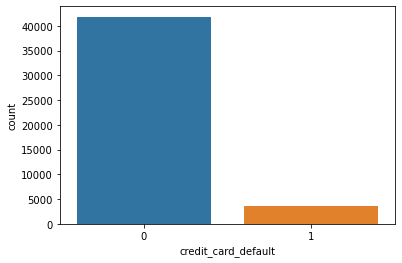

In [55]:
import seaborn as sns
sns.countplot(y_train)

In [59]:
# balance the class with equal distribution on normal datset
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

print(y_smote.value_counts())

model_test(x_smote,y_smote,clf_dict)

0    41831
1    41831
Name: credit_card_default, dtype: int64

Model : LogisticRegression()
all f1 scores :  [0.93970315 0.93565339 0.94049174 0.94488735 0.93527889 0.93452241
 0.93738004 0.93015052 0.93479557 0.93483826]
Avg. score :  93.68

Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.83745694 0.83520875 0.82355438 0.83843982 0.83124275 0.8269918
 0.82161472 0.83500687 0.830858   0.83244151]
Avg. score :  83.13

Model : LinearSVC()
all f1 scores :  [0.78012934 0.84626206 0.85432156 0.80394867 0.86347169 0.85780765
 0.73067705 0.84022954 0.89849995 0.92007066]
Avg. score :  83.95

Model : RandomForestClassifier()
all f1 scores :  [0.98722906 0.98567539 0.98795471 0.98777334 0.98707825 0.98724216
 0.99016632 0.98637342 0.98766626 0.98686857]
Avg. score :  98.74


In [60]:
# balance the class with equal distribution scaled dataset
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote_scaled, y_smote_scaled = over_sample.fit_resample(x_train_scaled, y_train)

print(y_smote_scaled.value_counts())
model_test(x_smote_scaled,y_smote_scaled,clf_dict)

0    41831
1    41831
Name: credit_card_default, dtype: int64

Model : LogisticRegression()
all f1 scores :  [0.96222248 0.96278032 0.96437111 0.96101774 0.96257698 0.95963064
 0.96371308 0.96014193 0.9600863  0.962642  ]
Avg. score :  96.19

Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.97498279 0.97045245 0.97071914 0.96998167 0.97127511 0.9716081
 0.9700981  0.96780193 0.96828952 0.96945949]
Avg. score :  97.05

Model : LinearSVC()
all f1 scores :  [0.96360686 0.962642   0.96515513 0.96169519 0.96276156 0.95998111
 0.96383516 0.96037736 0.96044928 0.96259935]
Avg. score :  96.23

Model : RandomForestClassifier()
all f1 scores :  [0.98616118 0.98508514 0.98568019 0.98729752 0.98520185 0.98499705
 0.98701923 0.98462266 0.98419162 0.98488931]
Avg. score :  98.55


In [61]:
# balance the class with equal distribution scaled pca dataset
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote_scaled_pca , y_smote_scaled_pca = over_sample.fit_resample(x_train_scaled_pca, y_train)

print(y_smote_scaled_pca.value_counts())
model_test(x_smote_scaled_pca,y_smote_scaled_pca,clf_dict)

0    41831
1    41831
Name: credit_card_default, dtype: int64

Model : LogisticRegression()
all f1 scores :  [0.96343587 0.96175504 0.965369   0.95970097 0.95961036 0.96066155
 0.96212304 0.96029307 0.95925216 0.96196606]
Avg. score :  96.14

Model : KNeighborsClassifier(n_neighbors=10)
all f1 scores :  [0.97657327 0.97010274 0.97161623 0.97100951 0.97266994 0.97321844
 0.97152983 0.96909133 0.97081413 0.97148794]
Avg. score :  97.18

Model : LinearSVC()
all f1 scores :  [0.96341746 0.96210526 0.96654364 0.96110852 0.95983888 0.9614614
 0.96274038 0.961629   0.95974197 0.96182137]
Avg. score :  96.2

Model : RandomForestClassifier()
all f1 scores :  [0.98551396 0.98430913 0.98573466 0.98614184 0.98355224 0.9844523
 0.98798943 0.98383862 0.98313599 0.98223054]
Avg. score :  98.47


## Preparing testing dataset

- have done the same preprocessing done for training dataset
    - converting string based category cols to numerical category
    - handeling null values

In [62]:
test_df = pd.read_csv('./dataset/test.csv')
test_df.head()

customer_id          name  age gender owns_car owns_house  no_of_children  \
0  CST_142525          Siva   52      F        Y          N             0.0   
1  CST_129215         Scott   48      F        N          N             1.0   
2  CST_138443      Victoria   50      F        N          N             1.0   
3  CST_123812  John McCrank   30      F        N          N             1.0   
4  CST_144450      Martinne   52      M        N          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          232640.53                998.0         Unknown   
1          284396.79               1338.0         Unknown   
2          149419.28               1210.0         Unknown   
3          160437.54                503.0        Laborers   
4          233480.37                157.0        Laborers   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   2.0             0.0              14406.73      26524.40   
1                   3.0             0.0              57479.99      68998.72   
2                   3.0             0.0              21611.01      25187.80   
3                   2.0             1.0              28990.76      29179.39   
4                   2.0             1.0              54213.72      82331.82   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  
0                     4         779.0              0                        0  
1                    70         806.0              0                        0  
2                    71         528.0              2                        0  
3                     9         815.0              0                        0  
4                    82         613.0              1                        1

In [63]:
# storing values for sample submission
customer_ids = test_df['customer_id'].values

In [64]:
test_df.drop(['customer_id','name'],axis=1,inplace=True)

def encode_binary(data,val):
    if data==val:
        return 1
    return 0

test_df['gender'] = test_df['gender'].apply(lambda x: encode_binary(x,'M'))
test_df['owns_car'] = test_df['owns_car'].apply(lambda x: encode_binary(x,'Y'))
test_df['owns_house'] = test_df['owns_house'].apply(lambda x: encode_binary(x,'Y'))

occupation_level = {
    'Unknown': 0,
    'Low-skill Laborers': 1,
    'Laborers': 2,
    'Cleaning staff': 3,
    'Drivers': 4,
    'Waiters/barmen staff': 5,
    'Cooking staff': 6,
    'Security staff': 7,
    'Secretaries': 8,
    'Realty agents': 9,
    'Sales staff': 10,
    'Accountants': 11,
    'Core staff': 12,
    'Medicine staff': 13,
    'Private service staff': 14,                  
    'Managers': 15,
    'HR staff': 16,
    'High skill tech staff': 17, 
    'IT staff': 18
}
test_df.replace({"occupation_type":occupation_level},inplace=True)
test_df.head()

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0   52       0         1           0             0.0          232640.53   
1   48       0         0           0             1.0          284396.79   
2   50       0         0           0             1.0          149419.28   
3   30       0         0           0             1.0          160437.54   
4   52       1         0           1             0.0          233480.37   

   no_of_days_employed  occupation_type  total_family_members  migrant_worker  \
0                998.0                0                   2.0             0.0   
1               1338.0                0                   3.0             0.0   
2               1210.0                0                   3.0             0.0   
3                503.0                2                   2.0             1.0   
4                157.0                2                   2.0             1.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              14406.73      26524.40                     4         779.0   
1              57479.99      68998.72                    70         806.0   
2              21611.01      25187.80                    71         528.0   
3              28990.76      29179.39                     9         815.0   
4              54213.72      82331.82                    82         613.0   

   prev_defaults  default_in_last_6months  
0              0                        0  
1              0                        0  
2              2                        0  
3              0                        0  
4              1                        1

In [65]:
null_value_cols =  ['no_of_children','total_family_members','migrant_worker']
for col in null_value_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
null_col_cont = ['no_of_days_employed','yearly_debt_payments','credit_score']
for col in null_col_cont:
    test_df[col] = test_df[col].fillna(test_df[col].mean())

test_df.isnull().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [79]:
test_x = test_df.copy()

# scaling test values with the same StandardScaler model
test_x = std_scale.transform(test_df)

# reducing dims of test values with pca model
test_x = pca.transform(test_x)

test_x[0]

array([-0.56739371,  0.03932061,  0.02562818, -0.34293143,  0.35122573,
        1.1291451 , -1.43204877, -1.02258026,  1.2424935 , -1.3712899 ,
       -1.64165973, -0.05860686])

## Testing final model

 - as we can see in above trails with different algorithms , random forest performed well, so going with DT.
 
 
 - results from online judge hacker earth
     - random forest gave f1 score of 92.34
     - logistic regression f1 score 91.17
     - svm f1 score 91.23


In [ ]:
sample_sub = pd.read_csv('./dataset/sample_submission.csv')
sample_sub

In [80]:
# # getting random forest result
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier()
# # clf.fit(x_train,y_train)
# # clf.fit(x_smote,y_smote)
# # clf.fit(x_smote_scaled,y_smote_scaled)
# clf.fit(x_smote_scaled_pca,y_smote_scaled_pca)
# y_pred = clf.predict(test_x)

# final_res = [[customer_ids[i],y_pred[i]] for i in range(len(y_pred))]
# my_sub = pd.DataFrame(final_res,columns=['customer_id','credit_card_default'])
# my_sub.to_csv("rf_scaled_pca.csv",index=False)

In [81]:
# # getting logistic regression result
# from sklearn.linear_model import LogisticRegression

# clf=LogisticRegression()
# # clf.fit(x_train,y_train)
# # clf.fit(x_smote,y_smote)
# # clf.fit(x_smote_scaled,y_smote_scaled)
# clf.fit(x_smote_scaled_pca,y_smote_scaled_pca)
# y_pred = clf.predict(test_x)

# final_res = [[customer_ids[i],y_pred[i]] for i in range(len(y_pred))]
# my_sub = pd.DataFrame(final_res,columns=['customer_id','credit_card_default'])
# my_sub.to_csv("logreg_scaled_pca.csv",index=False)

In [82]:
# # getting SVM result
# from sklearn.svm import LinearSVC

# clf_svc = LinearSVC()
# # clf.fit(x_train,y_train)
# # clf.fit(x_smote,y_smote)
# # clf.fit(x_smote_scaled,y_smote_scaled)
# clf.fit(x_smote_scaled_pca,y_smote_scaled_pca)
# y_pred = clf.predict(test_x)

# final_res = [[customer_ids[i],y_pred[i]] for i in range(len(y_pred))]
# my_sub = pd.DataFrame(final_res,columns=['customer_id','credit_card_default'])
# my_sub.to_csv("svm_scaled_pca.csv",index=False)